In [20]:
from collections import namedtuple, defaultdict
import codecs
from config import config
from bs4 import BeautifulSoup
import pdb
import torch
from nltk.tokenize import word_tokenize
#import tokenizer
import numpy as np
import re
import pickle
import random
##Added by Richard Sun
import en_core_web_sm
nlp = en_core_web_sm.load()
from data_reader import *

In [39]:
TRAIN_DATA_PATH = "data/2014/Restaurants_Train_v2.xml"
TEST_DATA_PATH = "data/2014/Restaurants_Test_Gold.xml"
TRAIN_DATA_PATH = "data/Indonesian/indo_tweets.csv"

# TRAIN_DATA_PATH = "./data/2014/Laptop_Train_v2.xml"
# TEST_DATA_PATH = "./data/2014/Laptops_Test_Gold.xml"

GLOVE_FILE = "../data/word_embeddings/indo_vectors.txt"
OUT_FILE = config.embed_path
DATA_FILE = config.data_path
DIC_FILE = config.dic_path

In [40]:
#!pip install xlrd
import pandas as pd
#help(pd.read_excel)
data = pd.read_csv(TRAIN_DATA_PATH)

In [56]:
data.Sentiment.describe()

count        7132
unique          3
top       Neutral
freq         3091
Name: Sentiment, dtype: object

In [59]:
data[pd.isnull(data[['Sentiment']]).any(axis=1)]

,Unnamed: 0,Username,Keyword,Tweet,Sentiment,Overal Sentiment,Unnamed: 5
6130,6130,ZUL_Hasan,ISIS,TIPS jadi saksi nikah : Jangan baper .. Sesama...,NaN,NaN,remarks: the ISIS in this context does not ref...
6534,6534,tifsembiring,ISIS,"ISIS ...? ada yg bilang ""Istri Sholihah Idaman...",NaN,NaN,remarks: ISIS here does not refer to the Islam...
6538,6538,tifsembiring,HTI,"@rayestu kmbalikan pd hti nurani mas, kita kom...",NaN,NaN,"remarks: hti nurani = hati nurani, does not re..."


In [32]:
data.to_csv('data/Indonesian/indo_tweets.csv')

In [4]:
dr = data_reader(config)
dr.load_data(config.train_path)
dr_valid = data_reader(config, False)
dr_valid.load_data(config.valid_path)
dr_test = data_reader(config, False)
dr_test.load_data(config.test_path)

In [9]:
samples = dr.generate_sample(dr.data_batch)

In [15]:
words = ['ss', 'ff','df','gf']
word_freq_pair = Counter(words)

In [6]:
data_batch = dh.to_batches(data)

defaultdict(<class 'int'>, {2: 805, 0: 2164, 1: 633})


In [8]:
data2 = dh.read(TEST_DATA_PATH, False)

Dataset number: 606
Target error meal
Local Embeddings Saved!


In [60]:
sample = reader.generate_sample(train_batch)
sent_vecs, mask_vecs, label_list, sent_lens = elmo_transform(sample)

In [62]:
sent_vecs, mask_vecs, label_list, sent_lens = elmo_transform([test_batch[0]])

In [97]:
# write to pkl
with open(DATA_FILE, "wb") as f:
    pickle.dump([train_batch, test_batch],f)

In [98]:
with codecs.open(DIC_FILE, 'wb') as f:
    pickle.dump(reader.id2word, f)

In [99]:
reader.gen_vectors_glove()

1411 unk out of 5138 vocab


In [54]:
from model_att import *
model = attTSA(config)

/Users/richardsun/anaconda3/envs/allennlp/lib/python3.6/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [107]:
doc = nlp(u"To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.")
target = 'food'
for token in doc:
#     if 'food' in token.head.text:
#         print(token)
#     children = [t.text for t in token.children]    
#     if 'food' in children:
#         print(token)
    print('Text:'+ token.text, 'Head:'+token.head.text, 'Children:',
           [child for child in token.children])
#     if token.text == 'food':
#         a = token
#     if token.text == 'deficiencies':
#         b= token
    

Text:To Head:be Children: []
Text:be Head:was Children: [To, fair]
Text:completely Head:fair Children: []
Text:fair Head:be Children: [completely]
Text:, Head:was Children: []
Text:the Head:factor Children: []
Text:only Head:factor Children: []
Text:redeeming Head:factor Children: []
Text:factor Head:was Children: [the, only, redeeming]
Text:was Head:was Children: [be, ,, factor, food, ,, but, make, .]
Text:the Head:food Children: []
Text:food Head:was Children: [the, ,, was]
Text:, Head:food Children: []
Text:which Head:was Children: []
Text:was Head:food Children: [which, above]
Text:above Head:was Children: [average]
Text:average Head:above Children: []
Text:, Head:was Children: []
Text:but Head:was Children: []
Text:could Head:make Children: []
Text:n't Head:make Children: []
Text:make Head:was Children: [could, n't, up, for]
Text:up Head:make Children: []
Text:for Head:make Children: [deficiencies]
Text:all Head:deficiencies Children: []
Text:the Head:deficiencies Children: []
Tex

In [103]:
for item in doc.sents:
    print(item)
    print('*******')

To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.
*******


In [46]:
doc = nlp(u'the screen is good but the battery sucks')
for token in doc:
#     if 'food' in token.head.text:
#         print(token)
#     children = [t.text for t in token.children]    
#     if 'food' in children:
#         print(token)
    print('Text:'+ token.text, 'Head:'+token.head.text, 'Children:',
           [child for child in token.children])

Text:the Head:screen Children: []
Text:screen Head:is Children: [the]
Text:is Head:is Children: [screen, good, but, sucks]
Text:good Head:is Children: []
Text:but Head:is Children: []
Text:the Head:battery Children: []
Text:battery Head:sucks Children: [the]
Text:sucks Head:is Children: [battery]


In [44]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True)
# trees = doc.print_tree()
# trees[0]

In [1]:
from Layer import SimpleCat
from data_reader_general import dataHelper, data_generator
#from model_glove import *
from model_crf import *
from config import config
cat_layer = SimpleCat(config)

In [2]:
#cat_layer.load_vector()

In [189]:
sent = 'To heal the hearts of believers and to enrage kuffar, \
munafikeen and murtadeen, we present the last video memoir of Shaheed Eisa Fazili. May Allah accept him into highest Jannah'
targets = ['Eisa Fazili', 'kuffar', 'munafikeen', 'murtadeen', 'Allah']

In [164]:
sent = "But the staff was so good to us"
targets = ['staff']

In [190]:
sentence_list = []
opinion_list = []
SentInst = namedtuple("SentenceInstance", "id text text_ids text_inds opinions")
OpinionInst = namedtuple("OpinionInstance", "target_text polarity class_ind target_mask target_ids")
for target in targets:
    opinion_inst = OpinionInst(target, 'negative', None, None, None)
    opinion_list.append(opinion_inst)
sent_Inst = SentInst(1, sent, None, None, opinion_list)
sentence_list.append(sent_Inst)

In [191]:
dh = dataHelper(config)
data, words = dh.process_raw_data(sentence_list)

In [192]:
data_batch = dh.to_batches(data)

defaultdict(<class 'int'>, {2: 5})


In [193]:
dg = data_generator(config, data_batch)

In [194]:
sent_vecs, mask_vecs, label_list, sent_lens = dg.elmo_transform(data_batch)

In [195]:
#model = AspectSent(config)

In [197]:
pred_label, best_seq = model.predict(sent_vecs, mask_vecs, sent_lens) 

In [198]:
pred_label

tensor([ 0,  0,  0,  0,  0])

In [199]:
scores, s_probs, best_seqs = model.compute_predict_scores(sent_vecs, mask_vecs, sent_lens)

In [200]:
scores

tensor([[ 2.6032, -4.7932,  0.9438],
        [ 2.6839, -5.2023,  1.0347],
        [ 2.7342, -5.2895,  1.0273],
        [ 2.7248, -5.2792,  1.0532],
        [ 2.7875, -5.3021,  1.0744]])

In [201]:
import torch.nn.functional as F
F.softmax(scores, dim=1)

tensor([[ 0.8397,  0.0005,  0.1598],
        [ 0.8385,  0.0003,  0.1612],
        [ 0.8462,  0.0003,  0.1535],
        [ 0.8415,  0.0003,  0.1582],
        [ 0.8470,  0.0003,  0.1527]])

In [203]:
from data_reader import data_reader
dr = data_reader(config)
dr.load_data(config.train_path)

In [205]:
dr.data_len

3001

In [210]:
token_list, mask_list, label_list, _ = zip(*dr.data_batch)

In [212]:
unique, counts = np.unique(label_list, return_counts=True)

In [10]:
from __future__ import division
from data_reader_general import *
from parse_path import dependency_path
#from configs.config_indo import config
import pickle
from Layer import GloveMaskCat
import numpy as np
import codecs
import copy
import os, sys

In [2]:
dr = data_reader(config)
path1 = 'data/indo/train.xml'
path2 = 'data/indo/dev.xml'
path3 = 'data/indo/test.xml'
dr.read_train_test_data([path1, path2, path3])

Reading Dataset....
Dataset number: 4993
Target not in the sentence ['Setnov']
Sentence: ['Akbar' 'Dorong' 'Golkar' 'Gelar' 'Munas' 'TanggapistatusSetnov' 'di'
 'KPK' 'http' ':' 'bit.ly' '2hKDT3o' 'http' ':' 'pic.twitter.com'
 'KHWcQUxTDN']
Dataset number: 1915
Dataset number: 1965
Tokenized Word Number: 31412
Local Vocabulary Size: 5120
Dictionary created successfully
Local Embeddings Saved!
defaultdict(<class 'int'>, {1: 3327, 0: 742, 2: 595})
Saving successfully!
defaultdict(<class 'int'>, {2: 219, 0: 389, 1: 1184})
Saving successfully!
defaultdict(<class 'int'>, {1: 1089, 0: 484, 2: 266})
Saving successfully!
Preprocessing Over!


In [3]:
dr = data_reader(config)
train_data = dr.load_data('data/indo/train.xml.pkl')
valid_data = dr.load_data('data/indo/dev.xml.pkl')

print('Training Samples:', len(train_data))
print('Validating Samples:', len(valid_data))


dg_train = data_generator(config, train_data)
dg_valid =data_generator(config, valid_data, False)


Training Samples: 4664
Validating Samples: 1792


In [19]:
sent_ids, mask_vecs, label_list, sent_lens, texts, targets = next(dg_train.get_ids_samples())

In [11]:
from model_crf_elmo_modified import *
from data_reader_general import *
from configs.config_crf_elmo import config
model = torch.load('data/models/crf_elmo_model.pt')

/home/nlp/anaconda3/envs/allennlp/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'model_crf_elmo_modified.AspectSent' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [12]:
dr = data_reader(config)
test_data = dr.load_data(config.test_path)
dg_test =data_generator(config, test_data, False)

In [27]:
test_data[33]

[['Desserts',
  'are',
  'almost',
  'incredible',
  ':',
  'my',
  'personal',
  'favorite',
  'is',
  'their',
  'Tart',
  'of',
  'the',
  'Day',
  '.'],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0,
 [2256, 19, 304, 431, 208, 41, 721, 355, 6, 50, 4412, 12, 2, 1488, 1],
 'Desserts are almost incredible: my personal favorite is their Tart of the Day.',
 ['Desserts']]

In [3]:
sent, mask, label, sent_len = next(dg_test.get_elmo_samples())

In [6]:
pred_label, scores, _  = model.predict(sent, mask, sent_len)

In [8]:
pred_label, scores, _  = model.predict(sent[:4], mask[:4], sent_len[:4])

In [9]:
scores

tensor([[ 1.3977, -0.7609, -0.2642],
        [ 1.4825, -0.6959, -0.2034],
        [ 2.4864, -0.5700, -2.3823],
        [ 2.5338, -0.5845, -2.3903]], grad_fn=<StackBackward>)

In [5]:
from parse_path import dependency_path
dp = dependency_path()
graph = dp.build_graph(text)
mat = dp.compute_node_distance(graph, num)

In [21]:
graph.edges

EdgeView([('staff-2', 'the-0'), ('staff-2', 'wait-1'), ('staff-2', 'is-3'), ('is-3', 'freindly-5'), ('is-3', 'make-8'), ('freindly-5', 'very-4'), ('make-8', ',-6'), ('make-8', 'they-7'), ('make-8', 'feel-10'), ('make-8', '.-21'), ('feel-10', 'it-9'), ('feel-10', 'eating-14'), ('eating-14', 'like-11'), ('eating-14', 'you-12'), ('eating-14', "'re-13"), ('eating-14', 'in-15'), ('in-15', 'town-20'), ('town-20', 'a-16'), ('town-20', 'little-18'), ('town-20', 'european-19'), ('little-18', 'freindly-17')])

In [12]:
import torch
def convert_mask_index(masks):
    '''
    Find the indice of none zeros values in masks, namely the target indice
    '''
    target_indice = []
    for mask in masks:
        indice = torch.nonzero(mask).squeeze(1).numpy()
        target_indice.append(indice)
    return target_indice

In [16]:
targets = convert_mask_index(torch.LongTensor([mask]))

In [23]:
max_w, _, _ = dp.compute_soft_targets_weights(mat, targets[0])

In [18]:
max_w

array([8.82496903e-01, 1.00000000e+00, 1.00000000e+00, 8.82496903e-01,
       3.24652467e-01, 6.06530660e-01, 3.24652467e-01, 3.24652467e-01,
       6.06530660e-01, 1.35335283e-01, 3.24652467e-01, 4.39369336e-02,
       4.39369336e-02, 4.39369336e-02, 1.35335283e-01, 4.39369336e-02,
       2.18749112e-03, 3.35462628e-04, 2.18749112e-03, 2.18749112e-03,
       1.11089965e-02, 3.24652467e-01])

In [8]:
nodes = graph.nodes
node_order = np.array([int(node.split('-')[1]) for node in nodes])

In [24]:
from spacy import displacy
doc = nlp(text)
displacy.render(doc, style='dep', jupyter=True)

In [19]:
text

"The wait staff is very freindly, they make it feel like you're eating in a freindly little european town."

In [6]:
for item in train_data:
    text = item[4]
    num = len(item[0])
    graph = dp.build_graph(text)
    mat = dp.compute_node_distance(graph, num)
    if num != len(mat):
        print(text)
        print(item[0])
        print(len(mat))
        print(graph.nodes)
    

TypeError: slice indices must be integers or None or have an __index__ method

In [38]:
len(mat)

22

In [25]:
import en_core_web_sm
spanlp = en_core_web_sm.load()
document = spanlp('The sangria was pretty tasty and good on a hot muggy day.')
edges = []
word_list = []
for token in document:
    # FYI https://spacy.io/docs/api/token
    word_list.append(token.text)
    
    for child in token.children:
        edges.append(('{0}-{1}'.format(token,token.i),
                    '{0}-{1}'.format(child,child.i)))

In [26]:
edges

[('sangria-1', 'The-0'),
 ('was-2', 'sangria-1'),
 ('was-2', 'tasty-4'),
 ('was-2', 'on-7'),
 ('was-2', '.-12'),
 ('tasty-4', 'pretty-3'),
 ('tasty-4', 'and-5'),
 ('tasty-4', 'good-6'),
 ('on-7', 'day-11'),
 ('day-11', 'a-8'),
 ('day-11', 'hot-9'),
 ('day-11', 'muggy-10')]

In [29]:
import networkx as nx
graph = nx.Graph(edges)

In [30]:
len(graph.nodes)

13

In [27]:
len(word_list)

13

In [4]:
sent_vecs, mask_vecs, label_list, sent_lens, tokens = next(dg_valid.get_ids_samples())

In [5]:
mask_vecs[0]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0])

In [6]:
sent_vecs[0]

tensor([   52,  2175,    11,  2176,   220,   102,    10,     3,   134,
          983,  2177,     3,   451,  2178,     1,  2179,    11,   152,
          834,   233,   218,    44,   260,    32,  1482,    37,     4,
          511,    32,  2180,  2181,    38,     6,   116,  1184,    13,
            1,   141,   107,     4,   984,     2])

In [10]:
def visualize_attention(dr_test, model):
    print("Evaluting")
    dr_test.reset_samples()
    model.eval()
    all_counter = 0
    correct_count = 0
    while dr_test.index < dr_test.data_len:
        sent, mask, label, sent_len, tokens = next(dr_test.get_ids_samples())
        sent, target = cat_layer(sent, mask)
        if config.if_gpu: 
            sent, target = sent.cuda(), target.cuda()
            label, sent_len = label.cuda(), sent_len.cuda()
        pred_label, attentions  = model.predict(sent, target, sent_len) 
        print(tokens[:3])
        print(mask[:3])
        print(attentions[:3])
        break

In [37]:
import numpy as np
emb_dim= 300
def load_pretrained_word_emb(file_path):
    '''
    Load a specified vocabulary
    '''
    word_emb = {}
    vocab_words = set()
    with open(file_path) as fi:
        for line in fi:
            items = line.split()
            word = ' '.join(items[:-1*emb_dim])
            vec = items[-1*emb_dim:]
            word_emb[word] = np.array(vec, dtype=np.float32)
            vocab_words.add(word)
    return word_emb, vocab_words

In [38]:
file = '../data/glove.840B.300d.txt'
a,b = load_pretrained_word_emb(file)

KeyboardInterrupt: 

In [33]:
a ='hello -0.1573 -0.29517 0.30453 -0.54773 0.098293 -0.1776 0.21662 0.19261 -0.21101 0.53788 -0.047755 0.40675 0.023592 -0.32814 0.046858 0.19367 0.25565 -0.021019 -0.15957 -0.1023 0.20303 -0.043333 0.11618 -0.18486 0.0011948 -0.052301 0.34587 0.052335 0.16774 -0.21384 0.055947 0.24934 -0.12179 0.16749 0.28922 -0.033739 0.3015 -0.13241 0.092635 0.37155 -0.2884 -0.0052731 -0.001005 -0.51153 -0.28476 -0.20139 0.11837 -0.0055891 0.43604 0.16796 -0.2701 0.063957 -0.093253 -0.22079 0.36501 0.06545 0.23941 -0.19292 0.098293 0.12172 -0.1168 -0.027436 0.20507 -0.39139 -0.23111 0.46239 0.22888 -0.028415 -0.1798 0.23817 0.28093 -0.47935 0.23177 -0.35587 0.14246 0.11861 0.011018 0.091986 0.0054809 -0.39955 -0.40183 -0.10629 -0.30851 0.12383 -0.16737 -0.43569 0.4211 -0.57416 -0.19964 0.51312 0.090747 -0.21657 0.043519 0.24288 0.081134 0.49104 -0.33342 -0.31056 -0.3136 0.26931 -0.14402 0.33185 -0.21662 -0.072985 0.080603 -0.7266 -0.098385 -0.36233 -0.25346 0.1154 0.25738 0.15802 -0.15633 -0.024581 0.35673 0.31153 0.33475 -0.081155 -0.3061 0.019077 -0.049047 -0.11232 -0.07417 0.35596 -0.2642 0.012781 -0.20715 0.020223 0.054534 -0.28803 0.42863 -0.10312 0.24771 0.013196 0.19768 -0.013528 -0.15134 0.20307 -0.028973 -0.022706 -0.29199 -0.082062 0.19048 0.0053574 0.14067 -0.28675 0.21343 0.42428 -0.28186 -0.11801 -0.45227 -0.0067998 0.044784 -0.0062886 0.25087 0.34481 -0.64459 -0.20467 0.35007 0.1468 -0.14007 -0.0050219 -0.24053 0.41426 -0.40902 0.21141 0.25726 -0.4883 0.027066 0.56367 -0.39594 -0.035206 0.63079 0.14343 0.038315 0.32527 -0.080335 -0.20065 -0.30848 -0.0031591 0.15296 -0.21014 0.42143 -0.20944 -0.069285 0.13555 -0.020401 -0.22555 0.33491 0.16035 0.17739 -0.023627 0.097575 -0.19395 -0.018754 -0.119 -0.0067027 -0.4178 0.29027 0.13034 -0.30212 0.61173 -0.39918 -0.020191 -0.34531 -0.092082 0.46818 0.36671 0.21021 -0.053162 -0.37872 -0.14271 -0.13604 0.31715 -0.17227 -0.091266 0.16417 0.15069 0.53556 -0.29678 0.13965 -0.29788 0.1282 0.1971 -0.045515 -0.41355 -0.050333 -0.39015 -0.29579 -0.096145 -0.03151 0.053714 -0.37309 -0.36523 -0.17235 0.39251 -0.065909 -0.25267 -0.34448 -0.11503 0.43665 0.18832 0.20631 0.27801 -0.046077 0.13397 -0.091953 -0.098542 0.15811 0.2752 0.081383 0.32077 -0.10028 0.1088 -0.24836 0.10477 0.15243 -0.071302 0.12861 0.23061 0.0074864 0.090918 -0.12269 -0.14831 0.010586 0.35745 -0.23412 -0.23746 -0.22646 -0.27641 -0.1634 0.071909 -0.093884 0.21331 -0.20627 0.44406 0.34691 0.019064 0.034657 0.36789 0.32276 -0.31099 -0.023443 -0.77048 -0.26001 0.033961 -0.13874 0.051973 -0.0090509 0.27427 0.046548 -0.48214 -0.1437 -0.1975 -0.038126 -0.16555 0.071697 0.049449 0.15386 -0.81663'

In [50]:
from model_parse_glove import *
from data_reader_general import *
from parse_path import dependency_path, constituency_path
from configs.config_parse import config
import pickle
from Layer import GloveMaskCat
import numpy as np
import codecs
import copy
import os, sys

In [51]:
    dr = data_reader(config)
    train_data = dr.load_data(config.train_path)
    valid_data = dr.load_data(config.valid_path)
    test_data = dr.load_data(config.data_path+'Restaurants_Test_Gold.xml.pkl')
    print('Training Samples:', len(train_data))
    print('Validating Samples:', len(valid_data))
    print('Testing Samples:', len(test_data))

    dg_train = data_generator(config, train_data)
    dg_valid =data_generator(config, valid_data, False)
    dg_test =data_generator(config, test_data, False)

Training Samples: 3001
Validating Samples: 601
Testing Samples: 1120


In [53]:
for item in train_data:
    if 'Lobster Bisque' in item[4]:
        print(item)

[['I', 'had', 'Lobster', 'Bisque', 'it', 'has', '2', 'oz', '.', 'of', 'Maine', 'Lobster', 'in', 'it', '.'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 0, [10, 32, 976, 2048, 16, 61, 169, 1345, 1, 12, 4022, 976, 14, 16, 1], 'I had Lobster Bisque it has 2 oz. of Maine Lobster in it.']
[['I', 'had', 'Lobster', 'Bisque', 'it', 'has', '2', 'oz', '.', 'of', 'Maine', 'Lobster', 'in', 'it', '.'], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, [10, 32, 976, 2048, 16, 61, 169, 1345, 1, 12, 4022, 976, 14, 16, 1], 'I had Lobster Bisque it has 2 oz. of Maine Lobster in it.']
[['My', 'boyfriend', 'had', 'the', 'New', 'England', 'Chowder', 'it', 'was', 'good', 'but', 'I', 'think', 'the', 'award', 'should', 'go', 'to', 'the', 'Lobster', 'Bisque', '.'], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, [122, 706, 32, 2, 255, 3439, 3440, 16, 8, 21, 18, 10, 405, 2, 3441, 385, 62, 7, 2, 976, 2048, 1], 'My boyfriend had the New England Chowder it was good but I think the award s

In [65]:
cp = constituency_path()
text = 'I had Lobster Bisque it has 2 Oz. of Maine Lobster in it.'
cp.build_parser(text).leaves()
#cp.proceed(text, [10, 11])

['I', 'had', 'Lobster', 'Bisque', 'it', 'has', '2', 'Oz', '.']

In [62]:
def convert_mask_index(masks):
    '''
    Find the indice of none zeros values in masks, namely the target indice
    '''
    target_indice = []
    for mask in masks:
        indice = torch.nonzero(mask == 1).squeeze(1).numpy()
        target_indice.append(indice)
    return target_indice

In [15]:
import networkx as nx
text = "same owner as the guy who owns typhoon , which is just down the street on St. marks and 1st ave . The food looks good!"
document = nlp(text.replace(" '", "'"))
edges = []
for token in document:
    # FYI https://spacy.io/docs/api/token
    for child in token.children:
        edges.append(('{0}-{1}'.format(token.lower_,token.i),
                    '{0}-{1}'.format(child.lower_,child.i)))

graph = nx.Graph(edges)
graph.nodes()

NodeView(('owner-1', 'same-0', 'as-2', ',-8', 'is-10', '.-21', 'guy-4', 'the-3', 'owns-6', 'who-5', 'typhoon-7', 'which-9', 'down-12', 'just-11', 'street-14', 'the-13', 'on-15', 'marks-17', 'st.-16', 'and-18', 'ave-20', '1st-19', 'food-23', 'the-22', 'looks-24', 'good-25', '!-26'))

In [16]:
graph

In [60]:
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP(r'../data/stanford-corenlp-full-2018-02-27')

In [75]:
def clean_str(text):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", text)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip()

In [76]:
clean_str(text)

'I had Lobster Bisque it has 2 Oz of Maine Lobster in it'

In [85]:
text = "the apple looks good but the oranges are bad"
text = clean_str(text)
words = nlp.word_tokenize(text)
words

['the', 'apple', 'looks', 'good', 'but', 'the', 'oranges', 'are', 'bad']

In [86]:
from nltk.tree import Tree
document = nlp.parse(text)
parsed_sent = Tree.fromstring(document)

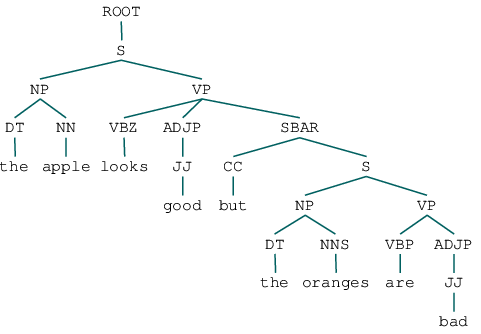

In [87]:
parsed_sent

In [42]:
parsed_sent.leaves()

['i',
 'love',
 'dogs',
 ',',
 'but',
 'I',
 'do',
 "n't",
 'like',
 'cats',
 ',',
 'He',
 'does',
 "n't",
 'like',
 'cats',
 'either',
 '.']

In [17]:
file = 'data/tweets/train.raw.txt'
with open(file) as f:
    tweets = f.readlines()

In [20]:
tweets[2]

'-1\n'

In [22]:
len(tweets)

18744

In [2]:
import numpy as np
file = '../data/sswe-u.txt'
word_emb = {}
with open(file) as fi:
    for line in fi:
        items = line.split()
        word_emb[items[0]] = np.array(items[1:], dtype=np.float32)

In [5]:
words = list(word_emb.keys())

In [33]:
from torch import nn
import torch
rnn = nn.GRU(32,20)
torch.range(0, 10)

/home/nlp/anaconda3/envs/allennlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [37]:
sent_vec = torch.randn(5, 10, 32)
batch_size, max_len, _ = sent_vec.size()
pos = torch.arange(0, max_len)
pos = pos.expand(batch_size, max_len)
#pos_vec = self.position_enc(pos)

In [39]:
pos = torch.arange(0, max_len)
pos

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
from data_reader_general import *
from backup.configs.config_crf_glove import config

In [211]:
args = config
dr = data_reader(args)
train_data = dr.load_data('data/tweets_mask_target/new_train.pkl')
valid_data = dr.load_data('data/tweets_mask_target/new_dev.pkl')
test_data = dr.load_data('data/tweets_mask_target/new_test.pkl')
print("Training Samples: {}".format(len(train_data)))
print("Validating Samples: {}".format(len(valid_data)))
print("Testing Samples: {}".format(len(test_data)))

Training Samples: 5104
Validating Samples: 803
Testing Samples: 1033


In [212]:
args = config
dr = data_reader(args)
train_data1 = dr.load_data('data/tweets/new_train.pkl')
valid_data1 = dr.load_data('data/tweets/new_dev.pkl')
test_data1 = dr.load_data('data/tweets/new_test.pkl')
print("Training Samples: {}".format(len(train_data)))
print("Validating Samples: {}".format(len(valid_data)))
print("Testing Samples: {}".format(len(test_data)))

Training Samples: 5104
Validating Samples: 803
Testing Samples: 1033


In [221]:
train_data1

'check out our review of the lovely britney spears concert a couple of weeks ago a true diva through through'

In [220]:
train_data[3][4]

'little wayne & TTTTT now thats hot ! young muuuuullllaaaaa bbaaaabbbaaaayyyy ha love it'

In [232]:
train_targets1 = [' '.join(item[5]) for item in train_data1]
dev_targets1 = [' '.join(item[5]) for item in valid_data1]
test_targets1 = [' '.join(item[5]) for item in test_data1]

In [233]:
train_targets = [item[5] for item in train_data]
dev_targets = [item[5] for item in valid_data]
test_targets = [item[5] for item in test_data]

In [236]:
train_targets_set = set(train_targets)
test_targets_set = set(test_targets)
dev_targets_set = set(dev_targets)
overlapping = train_targets_set.intersection(test_targets_set)

In [238]:
train_targets_set1 = set(train_targets1)
test_targets_set1 = set(test_targets1)
dev_targets_set1 = set(dev_targets1)
overlapping = train_targets_set.intersection(test_targets_set1)

In [192]:
all_targets_2 = train_targets_set.union(test_targets_set).union(dev_targets_set)

In [243]:
all_targets

{'a rod',
 'al anon mtg',
 'al gore',
 'albert pujols',
 'alex rodriguez',
 'alicia keys',
 'anderson cooper',
 'arnold schwarzenegger',
 'arod',
 'ashley tisdale',
 'ashton kutcher',
 'barack',
 'barack obama',
 'biden',
 'bieber',
 'bill gates',
 'britney',
 'britney sears',
 'britney spears',
 'britneyspears',
 'canon powershot',
 'charlie sheen',
 'chelsea handler',
 "conan o'brien",
 'dave matthews',
 'demi lovato',
 'donald trump',
 'elizabeth taylor',
 'ellen degeneres',
 'gaga',
 'george bush',
 'google',
 'google wave',
 'harry potter',
 'hilary swank',
 'hillary',
 'hillary clinton',
 'ipad',
 'iphone',
 'ipod',
 'j lo',
 'jimmy carter',
 'jimmy fallon',
 'joe biden',
 'john boehner',
 'john legend',
 'john mayer',
 'john mccain',
 'johnmayer',
 'jt',
 'justin',
 'justin bieber',
 'justin drew bieber',
 'justin timberlake',
 'katy perry',
 'kevin spacey',
 'khloe kardashian',
 'kim kardashian',
 'kindle',
 'kourtney kardashian',
 'lady gaga',
 'lakers',
 'lance armstrong',
 '

In [194]:
all_data = []
all_data.extend(train_data)
all_data.extend(valid_data)
all_data.extend(test_data)

In [195]:
all_data[1][5]

'obama'

In [196]:
tgt_samples = {}
for tgt in all_targets:
    samples = []
    for item in all_data:
        if item[5] == tgt:
            samples.append(item) 
    tgt_samples[tgt] = samples

In [198]:
#tgt_samples

In [141]:
tgt_num = [(k, len(v)) for k,v in tgt_samples.items()]

In [257]:
tgt_num

[('weird al', 5),
 ('lindsay lohan', 444),
 ('nicki minaj', 48),
 ('shakira', 21),
 ('hillary', 5),
 ("conan o'brien", 2),
 ('sara bareilles', 1),
 ('lady gaga', 205),
 ('al anon mtg', 1),
 ('martha stewart', 27),
 ('joe biden', 21),
 ('john legend', 23),
 ('ipod', 205),
 ('ryan seacrest', 12),
 ('miley ray cyrus', 1),
 ('anderson cooper', 17),
 ('taylorswift', 4),
 ('mandy moore', 19),
 ('hilary swank', 76),
 ('justin', 2),
 ('google wave', 152),
 ('kindle', 165),
 ('iphone', 186),
 ('hillary clinton', 76),
 ('lenny kravitz', 1),
 ('arnold schwarzenegger', 15),
 ('nicolas cage', 87),
 ('serena williams', 11),
 ('jt', 4),
 ('britney spears', 1020),
 ('russell brand', 21),
 ('wii', 214),
 ('biden', 4),
 ('larry king', 1),
 ('barack', 2),
 ('albert pujols', 1),
 ('britney sears', 1),
 ('gaga', 14),
 ('barack obama', 245),
 ('chelsea handler', 2),
 ('elizabeth taylor', 1),
 ('perez hilton', 16),
 ('mindflex game', 1),
 ('oprah', 15),
 ('al gore', 32),
 ('paris hilton', 28),
 ('a rod', 1),

In [144]:
tgt_train = []
tgt_dev = []
tgt_test = []
count = 0
for tn in tgt_num:
    count += tn[1]
    if count < 1000:
        tgt_dev.append(tn[0])
    elif count<2000:
        tgt_test.append(tn[0])
    else:
        tgt_train.append(tn[0])

In [245]:
with open('data/tweets/new-train-target.txt', 'w') as f:
    for tgt in tgt_train:
        f.write(tgt+'\n')

In [246]:
with open('data/tweets/new-dev-target.txt', 'w') as f:
    for tgt in tgt_dev:
        f.write(tgt+'\n')

In [247]:
with open('data/tweets/new-test-target.txt', 'w') as f:
    for tgt in tgt_test:
        f.write(tgt+'\n')

In [201]:
new_train_data = []
new_dev_data = []
new_test_data = []
for tgt in all_targets:
    if tgt in tgt_train:
        new_train_data.extend(tgt_samples[tgt])
    if tgt in tgt_dev:
        new_dev_data.extend(tgt_samples[tgt])
    if tgt in tgt_test:
        new_test_data.extend(tgt_samples[tgt])

In [204]:
import pickle
with open('data/tweets_mask_target/new_train.pkl', 'wb') as f:
    pickle.dump(new_train_data, f)
with open('data/tweets_mask_target/new_dev.pkl', 'wb') as f:
    pickle.dump(new_dev_data, f)
with open('data/tweets_mask_target/new_test.pkl', 'wb') as f:
    pickle.dump(new_test_data, f)

In [151]:
len(new_train_data)

5104

In [152]:
len(new_dev_data)

803

In [153]:
len(new_test_data)

1033

In [18]:
test_data1 = []
test_data2 = []
for i, tgt in enumerate(test_targets):
    if tgt in overlapping:
        test_data1.append(test_data[i])
    else:
        test_data2.append(test_data[i])

In [19]:
len(test_data1)

686

In [20]:
len(test_data2)

6

In [23]:
len(train_targets_set)

112

In [24]:
len(dev_targets_set)

77

In [25]:
len(test_targets_set)

82

In [15]:
len(overlapping)

77

In [29]:
target_label = {}
for t in overlapping:
    labels = []
    for item in train_data:
        if ' '.join(item[5]) == t:
            labels.append(item[2])
    target_label[t] = labels

In [32]:
for k, v in target_label.items():
    print('############')
    print(k)
    print(np.unique(v, return_counts=True))

############
john boehner
(array([0, 1, 2]), array([ 1,  3, 18]))
############
arnold schwarzenegger
(array([0, 1, 2]), array([4, 4, 4]))
############
micheal jackson
(array([0, 1, 2]), array([15, 32, 32]))
############
nicolas cage
(array([0, 1, 2]), array([ 9, 37, 19]))
############
lindsay lohan
(array([0, 1, 2]), array([ 37, 205,  91]))
############
nicki minaj
(array([0, 1, 2]), array([ 9,  3, 21]))
############
serena williams
(array([0, 2]), array([2, 5]))
############
johnmayer
(array([2]), array([1]))
############
shakira
(array([0, 1, 2]), array([6, 6, 7]))
############
george bush
(array([0, 1, 2]), array([ 2, 19, 30]))
############
weird al
(array([0, 1, 2]), array([1, 1, 2]))
############
nick jonas
(array([0, 1, 2]), array([11,  2,  4]))
############
jimmy carter
(array([0, 1, 2]), array([ 5, 61, 20]))
############
bill gates
(array([0, 1, 2]), array([ 2, 38,  6]))
############
britney spears
(array([0, 1, 2]), array([219, 375, 166]))
############
conan o'brien
(array([0]

In [7]:
labels1 = [item[2]  for item in train_data]
labels2 = [item[2]  for item in valid_data]
labels3 = [item[2]  for item in test_data]

In [10]:
np.unique(labels3, return_counts=True)

(array([0, 1, 2]), array([173, 346, 173]))

In [4]:
args = config
dr = data_reader(args)
train_data = dr.load_data('data/tweets/train.pkl')
valid_data = dr.load_data('data/indo/dev.xml.pkl')
test_data = dr.load_data('data/indo/test.xml.pkl')
print("Training Samples: {}".format(len(train_data)))
print("Validating Samples: {}".format(len(valid_data)))
print("Testing Samples: {}".format(len(test_data)))


# dg_train = data_generator(args, train_data)
# dg_valid = data_generator(args, valid_data, False)
# dg_test = data_generator(args, test_data, False)

Training Samples: 5206
Validating Samples: 1792
Testing Samples: 1839


In [4]:
data_all = []
data_all.extend(train_data)
data_all.extend(valid_data)
data_all.extend(test_data)

In [5]:
import numpy as np
np.random.shuffle(data_all)

In [6]:
new_dev = data_all[:1000]
new_test = data_all[1000:2000]
new_train = data_all[2000:]

In [7]:
import pickle
with open('data/indo/shuffled_train.pkl', 'wb') as f:
    pickle.dump(new_train, f)

In [8]:
with open('data/indo/shuffled_dev.pkl', 'wb') as f:
    pickle.dump(new_dev, f)

In [9]:
with open('data/indo/shuffled_test.pkl', 'wb') as f:
    pickle.dump(new_test, f)

In [4]:
labels = [item[2] for item in train_data]

In [5]:
import numpy as np
a, b =np.unique(labels, return_counts=True)

In [6]:
b

array([1310, 2602, 1294])

In [41]:
3327/b.sum()

0.7133361921097771

In [18]:
import pickle
with open('data/tweets/vocab/local_emb.pkl', 'rb') as f:
    vocab = pickle.load(f)

In [241]:
import numpy as np
def load_pretrained_word_emb(file_path):
    '''
    Load a specified vocabulary
    '''
    word_emb = {}
    vocab_words = set()
    with open(file_path) as fi:
        for line in fi:
            items = line.split()
            word = ' '.join(items[:-3*100])
            vec = items[-3*100:]
            word_emb[word] = np.array(vec, dtype=np.float32)
            vocab_words.add(word)
    return word_emb, vocab_words

In [242]:
word_emb, vocab_words = load_pretrained_word_emb('../data/glove.840B.300d.txt')

In [249]:
tgt_emb = []
for tgt in all_targets:
    w_e = np.zeros(300)
    for w in tgt.split():
        w_e += word_emb[w]
    w_e = w_e/len(tgt.split())
    tgt_emb.append(w_e)

In [252]:
tgt_emb = np.vstack(tgt_emb)
tgt_emb.shape

(118, 300)

In [253]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(tgt_emb)

Text(0.5, 1.0, 'Word Embeddings for Targets')

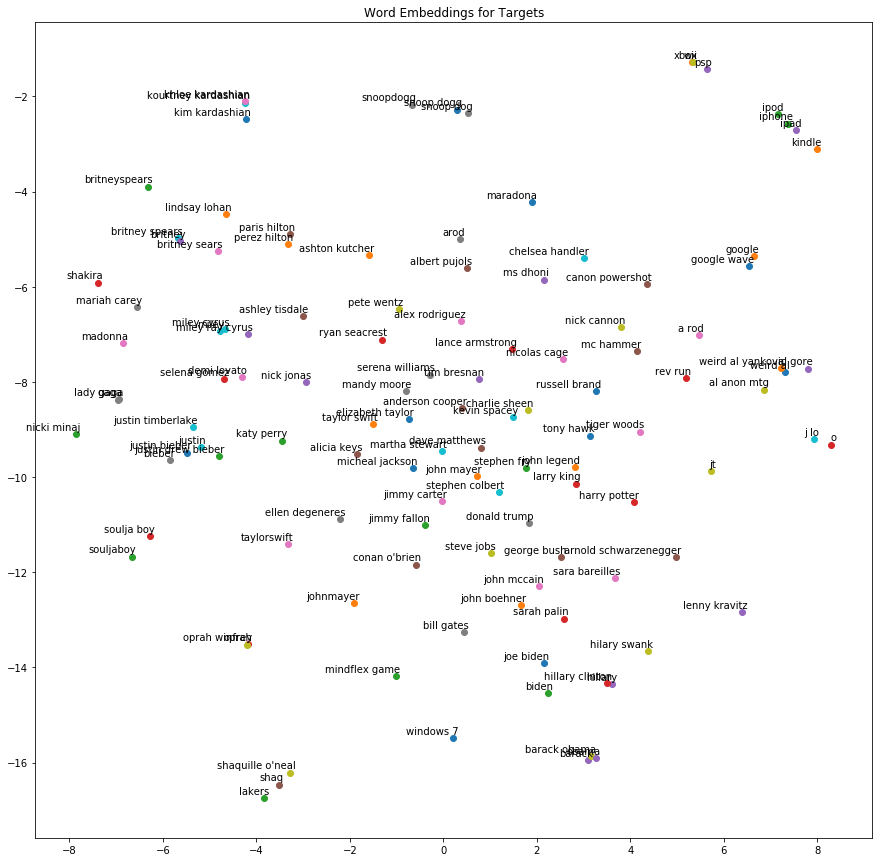

In [256]:
from matplotlib import pyplot as plt
%matplotlib inline
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')

words = all_targets
plot(two_d_embeddings, words)
plt.title('Word Embeddings for Targets')

In [25]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score

In [6]:
import pickle
with open('data/tweets/vocab/dict.pkl', 'rb') as f:
    w2id, id2w, words = pickle.load(f)

In [14]:
words[333]

'fan'

In [13]:
a[333]

'fan'

In [21]:
words = set([w.lower() for w in b])

In [8]:
import numpy as np
file = '../data/sswe-u.txt'
word_emb = {}
with open(file) as fi:
    for line in fi:
        items = line.split()
        word_emb[items[0]] = np.array(items[1:], dtype=np.float32)

In [21]:
embs= []
for w in words:
    try:
        emb = word_emb[w]
    except:
        emb = word_emb['unk']
    embs.append(emb)

In [22]:
embs = np.stack(embs)
#embs = torch.stack(embs)

In [23]:
#embs = torch.FloatTensor(embs)

In [24]:
with open('data/tweets/vocab/sswe-u.pkl', 'wb') as f:
    pickle.dump(embs, f)

In [37]:
lstm = torch.nn.LSTM(10, 8, batch_first=True, num_layers = 2, bidirectional=True)

In [38]:
a= torch.randn(3, 7, 10)

In [39]:
o, h = lstm(a)

In [63]:
import torch
gru = torch.nn.GRU(20, 20, batch_first=True)

In [74]:
a = torch.randn(3, 20)
m = torch.randn(3, 20)

In [75]:
c,m=gru(a.unsqueeze(1),m.unsqueeze(0))

In [77]:
m.size()

torch.Size([1, 3, 20])